# Downloading & Unzipping the Wine Quality Dataset
Using linux commands we download from the Irvine archive and unzip each file separately, we then install the `pycaret` package and it's dependencies.



In [1]:
# !wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip
!unzip -q wine+quality.zip

In [2]:
# only run this on initial setup!
%pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 10.5 MB

# Restarting your Runtime after installing pycaret

If you do not restart the runtime in colab after installing pycaret you may get an error when using the library!

I kept getting an Attribute Error on missing histogram axes which was completely unrelated, so make sure to restart your runtime!

Top Menu Bar -> Runtime -> Restart Runtime or click the Restart Runtime button

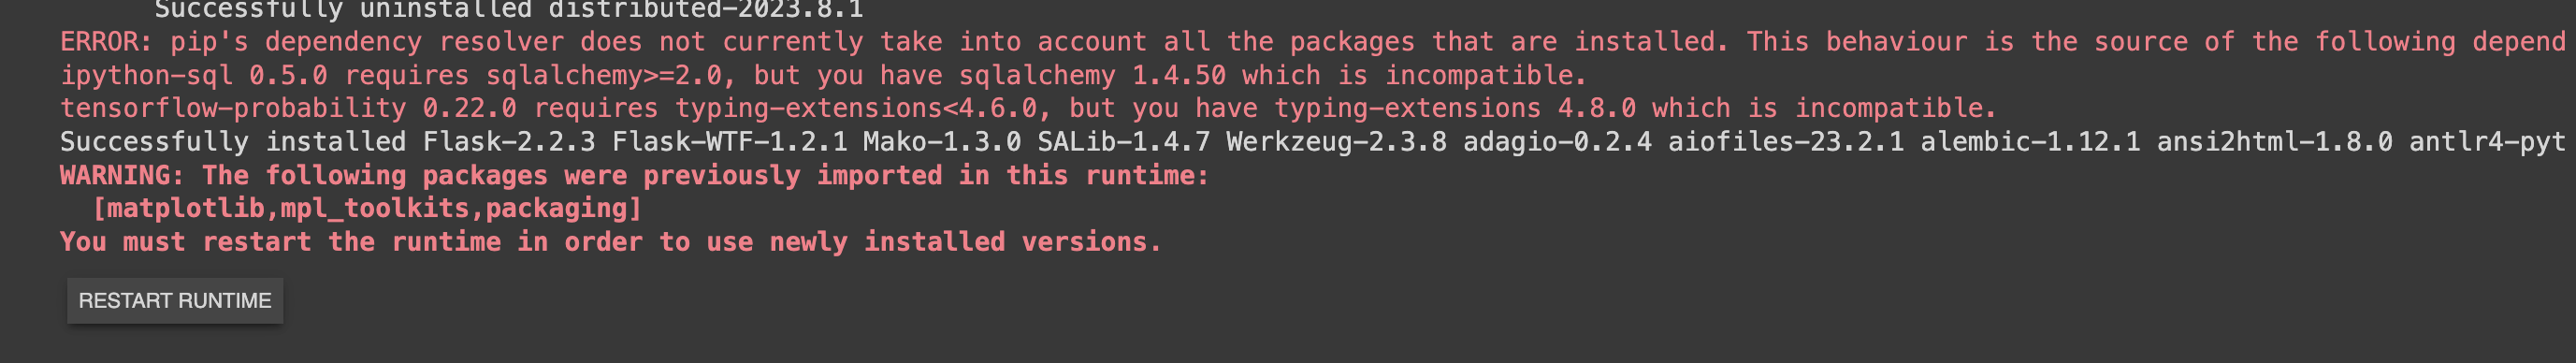

# Pandas CSV Import
Print head to show a preview of the dataset

In [1]:
import pandas as pd
df = pd.read_csv('winequality-red.csv', delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Setting up the Pycaret Machine Learning Workflow
Specified target for the project is **alcohol** and the task is **regression**

I chose to use the functional style of programming instead of the OOP one since Pycaret provides options to use both methods and objects.

The `setup` function initializes the pycaret workflow and creates a transformation pipeline for our model.

In [2]:
from pycaret.regression import *
s = setup(df, target="alcohol")

,Description,Value
0,Session id,6606
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


# Comparing Models

The `compare_models` function trains the estimators available in pycaret libraries using cross-validation (CV). It outputs a table with average CV scores based on metrics like MAE, MSE, RMSE, etc.

We can extend the compare_models function with our own metrics if we want to.


Catboost Regressor AI is supposedly the best in multiple metrics for our usecase, so we use it for our experiment.

In [3]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3185,0.2113,0.4574,0.7997,0.0392,0.0303,2.2680
lightgbm,Light Gradient Boosting Machine,0.3348,0.2327,0.4806,0.7795,0.0412,0.0319,0.5000
xgboost,Extreme Gradient Boosting,0.3351,0.2498,0.4980,0.7628,0.0426,0.0319,0.2340
et,Extra Trees Regressor,0.3438,0.2605,0.5086,0.7530,0.0435,0.0327,0.3380
rf,Random Forest Regressor,0.3696,0.2649,0.5134,0.7478,0.0440,0.0352,0.8160
gbr,Gradient Boosting Regressor,0.3896,0.2742,0.5226,0.7395,0.0448,0.0372,0.2090
lr,Linear Regression,0.4455,0.3464,0.5849,0.6709,0.0507,0.0427,0.8550
lar,Least Angle Regression,0.4455,0.3464,0.5849,0.6709,0.0507,0.0427,0.0310
ada,AdaBoost Regressor,0.5347,0.4360,0.6596,0.5841,0.0573,0.0519,0.1550
dt,Decision Tree Regressor,0.4642,0.5013,0.7055,0.5223,0.0604,0.0440,0.0310


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

# Plotting residuals for CatBoost AI

In [4]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

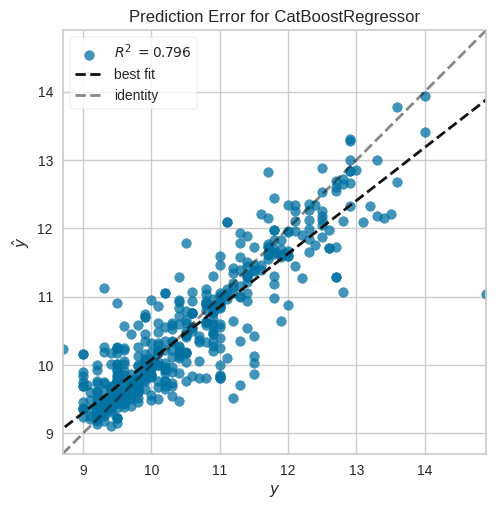

In [5]:
# plot_model(best, plot='feature')
plot_model(best, plot='error')
# evaluate_model(best)

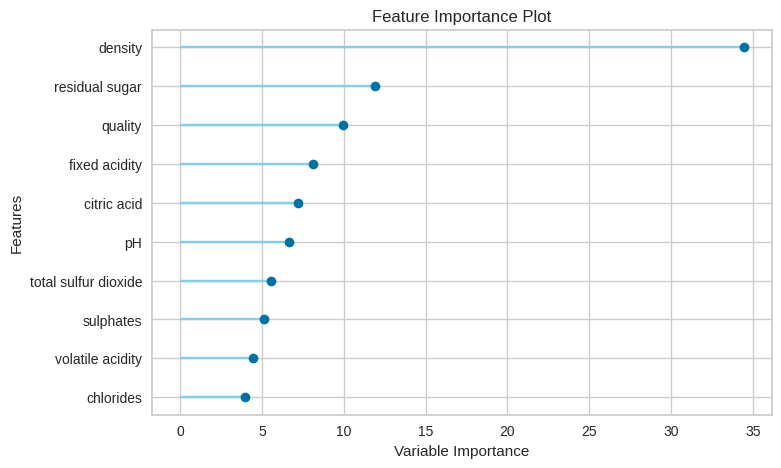

In [7]:
plot_model(best, plot='feature')

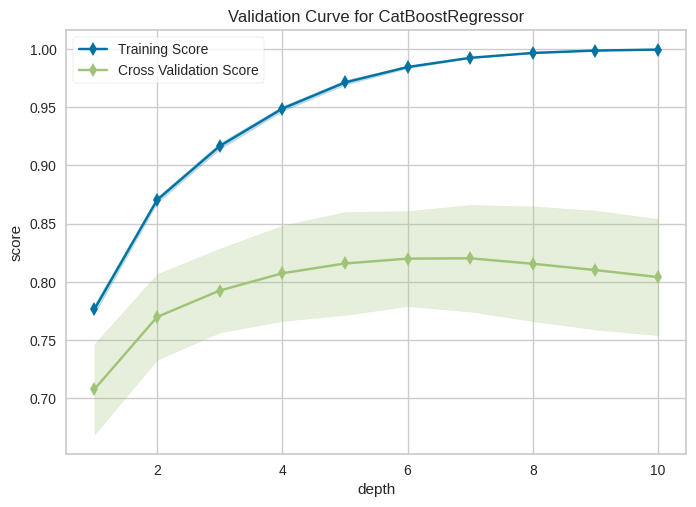

In [10]:
plot_model(best, plot='vc')

In [6]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.3434,0.2638,0.5136,0.7959,0.0433,0.0322


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
1304,7.6,0.79,0.21,2.3,0.087,21.0,68.0,0.99550,3.12,0.44,5,9.200000,9.764865
229,6.9,0.52,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.50,5,11.000000,10.552641
491,9.2,0.41,0.50,2.5,0.055,12.0,25.0,0.99520,3.34,0.79,7,13.300000,13.001596
266,8.1,0.87,0.00,3.3,0.096,26.0,61.0,1.00025,3.60,0.72,4,9.800000,10.268591
746,8.2,0.34,0.38,2.5,0.080,12.0,57.0,0.99780,3.30,0.47,6,9.000000,9.832039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,6,9.200000,9.428241
1439,7.3,0.67,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,6,11.066667,11.003373
350,10.7,0.67,0.22,2.7,0.107,17.0,34.0,1.00040,3.28,0.98,6,9.900000,10.453561
387,8.3,0.66,0.15,1.9,0.079,17.0,42.0,0.99720,3.31,0.54,6,9.600000,9.540267


# Predicting based on new data
Copying the original dataset and removing the `alcohol` column, we then predict it as `prediction_label` using our CatBoost regressor model

In [7]:
data = df.copy() # add other data here or something
# data.drop('alcohol', axis=1, inplace=True)
predictions = predict_model(best, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.1729,0.0918,0.3030,0.9191,0.0257,0.0164


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.4,9.449841
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,9.8,9.747260
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,9.8,9.715982
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,9.8,10.126814
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.4,9.449841


# Feature removal
Based on the feature importance plot from the original dataset, four features are removed from the data.

In [32]:
data = df.copy()
# data.drop('sulphates', axis=1, inplace=True)
# data.drop('total sulfur dioxide', axis=1, inplace=True)
data.drop('free sulfur dioxide', axis=1, inplace=True)
# data.drop('chlorides', axis=1, inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
from pycaret.regression import *
s = setup(data, target="alcohol")

,Description,Value
0,Session id,4342
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 11)"
4,Transformed data shape,"(1599, 11)"
5,Transformed train set shape,"(1119, 11)"
6,Transformed test set shape,"(480, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [34]:
best1 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3358,0.2409,0.4870,0.7848,0.0416,0.0319,2.2280
lightgbm,Light Gradient Boosting Machine,0.3466,0.2578,0.5041,0.7702,0.0432,0.0330,0.3350
xgboost,Extreme Gradient Boosting,0.3387,0.2634,0.5085,0.7651,0.0437,0.0323,0.2670
et,Extra Trees Regressor,0.3440,0.2792,0.5244,0.7511,0.0449,0.0328,0.3130
rf,Random Forest Regressor,0.3765,0.2927,0.5359,0.7410,0.0460,0.0359,0.6740
gbr,Gradient Boosting Regressor,0.4018,0.2933,0.5386,0.7385,0.0463,0.0383,0.2700
lr,Linear Regression,0.4602,0.3622,0.6008,0.6718,0.0520,0.0440,0.0310
lar,Least Angle Regression,0.4605,0.3621,0.6007,0.6718,0.0520,0.0440,0.0280
ada,AdaBoost Regressor,0.5667,0.4902,0.6988,0.5631,0.0604,0.0547,0.1470
dt,Decision Tree Regressor,0.4779,0.5801,0.7548,0.4870,0.0647,0.0455,0.0550


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

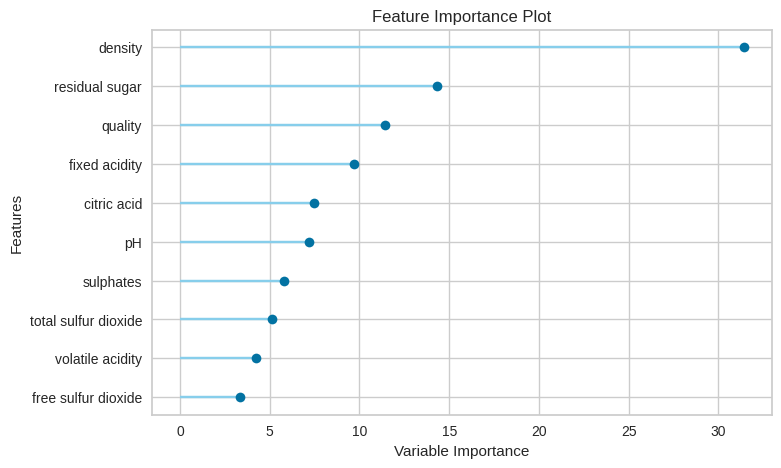

In [31]:
plot_model(best1, plot='feature')

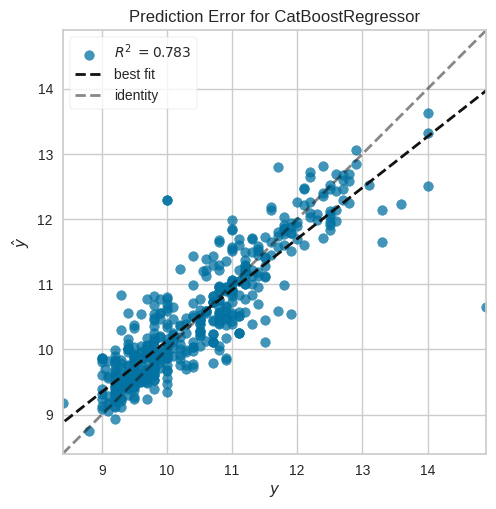

In [56]:
plot_model(best1, plot='error')

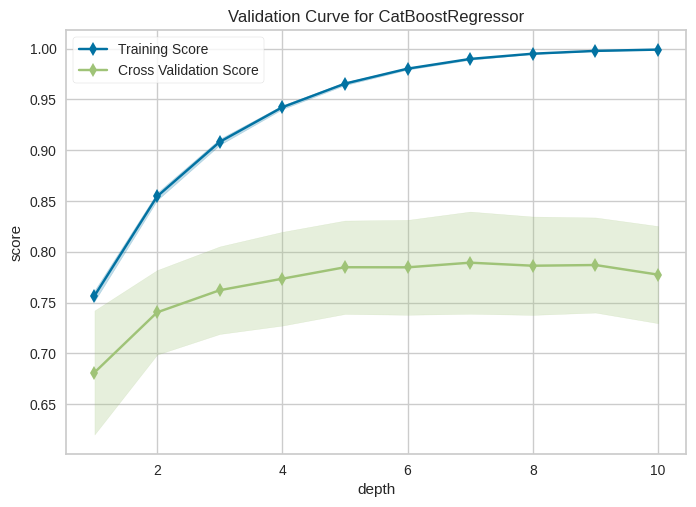

In [35]:
plot_model(best1, plot='vc')

In [36]:
predict_model(best1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.3112,0.1901,0.4360,0.8317,0.0376,0.0298


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
230,5.2,0.480,0.04,1.6,0.054,106.0,0.99270,3.54,0.62,7,12.2,13.015272
76,8.8,0.410,0.64,2.2,0.093,42.0,0.99860,3.54,0.66,5,10.5,9.988154
1240,7.5,0.610,0.20,1.7,0.076,60.0,0.99494,3.10,0.40,5,9.3,9.335371
1469,7.3,0.980,0.05,2.1,0.061,49.0,0.99705,3.31,0.55,3,9.7,9.287852
1577,6.2,0.700,0.15,5.1,0.076,27.0,0.99622,3.54,0.60,6,11.9,11.394550
...,...,...,...,...,...,...,...,...,...,...,...,...
1154,6.6,0.580,0.00,2.2,0.100,63.0,0.99544,3.59,0.68,6,11.4,11.532684
515,8.5,0.655,0.49,6.1,0.122,151.0,1.00100,3.31,1.14,5,9.3,9.872507
1119,5.6,0.660,0.00,2.5,0.066,15.0,0.99256,3.52,0.58,5,12.9,12.760352
417,7.0,0.580,0.12,1.9,0.091,124.0,0.99560,3.44,0.48,5,10.5,9.966209


In [37]:
data = data.copy() # add other data here or something
# data.drop('alcohol', axis=1, inplace=True)
predictions = predict_model(best1, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.1762,0.0749,0.2737,0.9340,0.0237,0.0169


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,5,9.4,9.449488
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,5,9.8,9.516198
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,5,9.8,9.643232
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,6,9.8,9.898276
4,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,5,9.4,9.449488


# Polynomial Features
The `polynimial_features` parameter determines if there is a non linear relationship that exists between the features in the dataset. This allows for more complex relationships to be identified to better analyze the data.

In [68]:
data = df.copy()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [69]:
from pycaret.regression import *
s = setup(data, target="alcohol", polynomial_features = True)

,Description,Value
0,Session id,2073
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 78)"
5,Transformed train set shape,"(1119, 78)"
6,Transformed test set shape,"(480, 78)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [70]:
best2 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3393,0.2455,0.4935,0.7827,0.0421,0.0322,13.0910
lightgbm,Light Gradient Boosting Machine,0.3478,0.2582,0.5068,0.7710,0.0434,0.0331,2.7870
et,Extra Trees Regressor,0.3534,0.2888,0.5357,0.7467,0.0460,0.0337,0.8900
rf,Random Forest Regressor,0.3809,0.2913,0.5380,0.7432,0.0461,0.0363,2.3470
xgboost,Extreme Gradient Boosting,0.3528,0.2910,0.5382,0.7424,0.0459,0.0335,1.3490
gbr,Gradient Boosting Regressor,0.3961,0.2954,0.5419,0.7393,0.0464,0.0378,1.3340
ada,AdaBoost Regressor,0.5547,0.4745,0.6872,0.5816,0.0594,0.0536,0.5270
ridge,Ridge Regression,0.5437,0.4843,0.6951,0.5729,0.0600,0.0520,0.0310
dt,Decision Tree Regressor,0.4470,0.4820,0.6899,0.5712,0.0594,0.0424,0.0600
lr,Linear Regression,0.5158,0.5115,0.6981,0.5580,0.0613,0.0495,0.2780


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

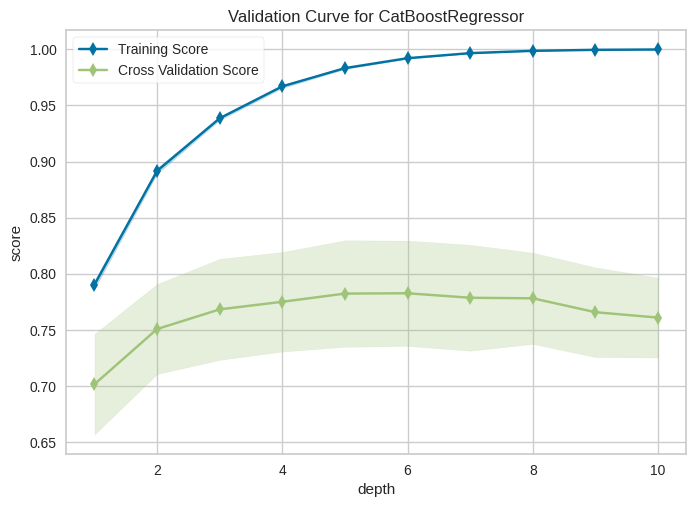

In [71]:
plot_model(best2, plot='vc')

In [72]:
predict_model(best2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.2897,0.1737,0.4168,0.8404,0.0356,0.0274


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,5,10.1,10.014722
102,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.99720,3.30,0.59,6,9.0,9.260775
1290,7.6,0.740,0.00,1.9,0.100,6.0,12.0,0.99521,3.36,0.59,5,11.0,10.358967
580,12.3,0.500,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,5,9.6,9.587616
130,8.0,0.745,0.56,2.0,0.118,30.0,134.0,0.99680,3.24,0.66,5,9.4,9.406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,7.7,0.915,0.12,2.2,0.143,7.0,23.0,0.99640,3.35,0.65,7,10.2,10.429103
884,8.8,0.610,0.19,4.0,0.094,30.0,69.0,0.99787,3.22,0.50,6,10.0,9.813287
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,6,10.4,10.318859
1405,7.7,0.280,0.30,2.0,0.062,18.0,34.0,0.99520,3.28,0.90,7,11.3,11.258609


In [73]:
data = data.copy() # add other data here or something
# data.drop('alcohol', axis=1, inplace=True)
predictions = predict_model(best2, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.1403,0.0592,0.2433,0.9479,0.0209,0.0134


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.4,9.441625
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,9.8,9.722925
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,9.8,9.573318
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,9.8,9.840618
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.4,9.441625


# Remove Outliers
The `remove_outlier` function selects and removes outliers from the dataset to ensure that the maximum accuracy in prediction is achieved.

In [38]:
data = df.copy()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
from pycaret.regression import *
s = setup(data, target="alcohol", remove_outliers = True)

,Description,Value
0,Session id,8043
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1543, 12)"
5,Transformed train set shape,"(1063, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [40]:
best3 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3592,0.2664,0.5154,0.7611,0.0440,0.0342,2.5010
lightgbm,Light Gradient Boosting Machine,0.3757,0.2817,0.5297,0.7475,0.0453,0.0356,0.7300
xgboost,Extreme Gradient Boosting,0.3653,0.2950,0.5415,0.7371,0.0462,0.0346,0.4190
et,Extra Trees Regressor,0.3701,0.2998,0.5466,0.7306,0.0467,0.0352,0.7490
rf,Random Forest Regressor,0.3971,0.3030,0.5498,0.7288,0.0471,0.0378,0.9020
gbr,Gradient Boosting Regressor,0.4165,0.3232,0.5679,0.7105,0.0486,0.0397,0.7190
lr,Linear Regression,0.4636,0.3718,0.6081,0.6654,0.0527,0.0444,1.1020
lar,Least Angle Regression,0.4636,0.3719,0.6082,0.6654,0.0527,0.0444,0.3520
ada,AdaBoost Regressor,0.5396,0.4412,0.6633,0.6050,0.0573,0.0521,0.4220
dt,Decision Tree Regressor,0.5112,0.5896,0.7653,0.4722,0.0654,0.0486,0.7790


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

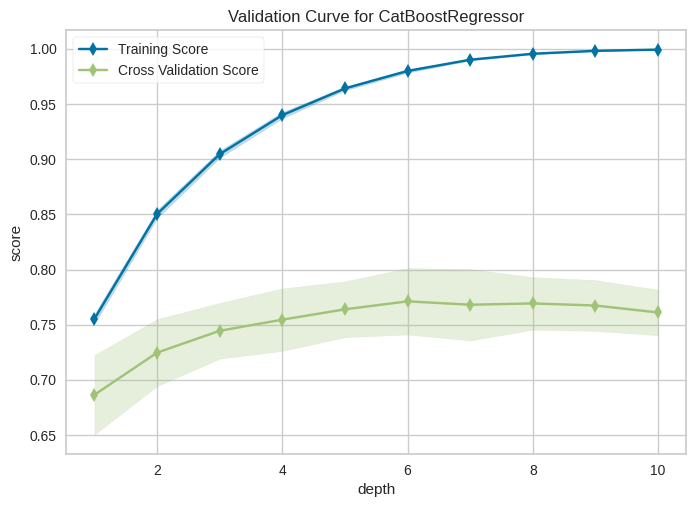

In [41]:
plot_model(best3, plot='vc')

In [42]:
predict_model(best3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.3417,0.2536,0.5036,0.7798,0.0426,0.0326


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
879,7.2,0.600,0.04,2.5,0.076,18.0,88.0,0.99745,3.53,0.55,5,9.5,9.534814
571,6.2,0.360,0.24,2.2,0.095,19.0,42.0,0.99460,3.57,0.57,6,11.7,11.769982
805,8.2,0.280,0.40,2.4,0.052,4.0,10.0,0.99356,3.33,0.70,7,12.8,12.812894
696,7.0,0.650,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,6,9.5,9.555435
1392,7.1,0.620,0.06,1.3,0.070,5.0,12.0,0.99420,3.17,0.48,5,9.8,10.081474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,6.9,0.540,0.30,2.2,0.088,9.0,105.0,0.99725,3.25,1.18,6,10.5,9.815882
1012,7.7,1.005,0.15,2.1,0.102,11.0,32.0,0.99604,3.23,0.48,5,10.0,9.318595
182,7.2,0.730,0.02,2.5,0.076,16.0,42.0,0.99720,3.44,0.52,5,9.3,9.743062
110,7.8,0.560,0.19,1.8,0.104,12.0,47.0,0.99640,3.19,0.93,5,9.5,9.707134


In [43]:
data = data.copy() # add other data here or something
# data.drop('alcohol', axis=1, inplace=True)
predictions = predict_model(best3, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.2023,0.1192,0.3453,0.8949,0.0293,0.0194


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.4,9.426712
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,9.8,9.712326
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,9.8,9.779837
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,9.8,9.806211
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.4,9.426712


# Saving Model to Python pickle file

In [ ]:
save_model(best, 'best')
save_model(best, 'best1')
save_model(best, 'best2')
save_model(best, 'best3')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7be3ee68d4e0>)

# Loading Model from Python pickle file

In [ ]:
loaded_model = load_model('best')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.